In [ ]:
1982import numpy as np
import seaborn as sns
import scipy.optimize as op
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp


# Comparación de metodos:
Los metodos de shooting y solve_bvp no dan exactamente igual. Usaremos una analogia al metodo de shooting con raicaes para encontrar para que valor xxx nos da exactamte igual 

#Ecuación diferencial
\begin{equation}
\frac{d^2A}{dx^2} - \frac{k}{D}A = 0.  
\end{equation}

In [ ]:
def deriv(t, y, params): return [y[1], params[1]*y[0]/params[0] - params[2]*y[1]]

In [ ]:
def shooting( t0, tf, dt, y0, yf, v0, params):

    def h(v0, y0, yf, t0, tf, dt, params):
        T=np.arange(t0, tf+dt, dt)
        return solve_ivp(deriv, [t0, tf], [y0, v0], t_eval=T,
                        args=(params,)).y[0][-1] -yf
    
    T = np.arange(t0,tf,dt)
 

    # Compute the root : v0 such us h(v0)=0
    v0 = op.root(h, v0, args=(y0, yf, t0, tf, dt, params)).x[0]


    #Use the solution and solve the ivp
    return solve_ivp(deriv, [T.min(), T.max()], [y0, v0], t_eval=T,
                     args=(params,))
    
    


# Metodo de solve_bvp

In [ ]:
def bvp(t0, tf, N, y0, yf, params):

    def bc(y0, yf, params):
        return [y0[0]-0.4, yf[0]-0.5, *params]

    return solve_bvp(deriv, bc, np.linspace(t0, tf, N), np.zeros((2,N)),p=params)
    



/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


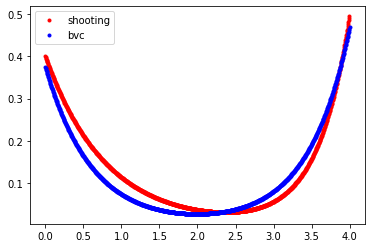

In [ ]:
def graph(PARAMS,v0):

    #PARAMS = (1.5e-6, 5e-6, -2.70)
    #PARAMS = (a, b, c)

    sols = shooting( 0.0, 4.0, 0.004, 0.4, 0.5, v0, PARAMS)
    sol_bvp = bvp(0.0, 4.0, 1000, 0.4, 0.5, PARAMS)

    #plot shooting
    plt.plot(sols.t, sols.y[0],"r.",label = r"shooting")


    #plt.plot(sols2.t, sols2.y[0],"k.",label = r"shooting")

    #plot bvc
    plt.plot(sol_bvp.x, sol_bvp.y[0],"b.",label = r"bvc")

    plt.legend()

graph((1, 3, -1.1),-132)

In [ ]:
PARAMS = (1.5e-6, 5e-6, 4.8920)
sols = shooting( 0.0, 4.0, 0.004, 0.1, 0.0, +0.33, PARAMS)
sol_bvp = bvp(0.0, 4.0, 1000, 0.4, 0.0, PARAMS)

print(sols.t.shape,sol_bvp.x.shape)

(1000,) (1000,)


/usr/local/lib/python3.7/dist-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:

def Re(PARAMS):
        
    sols = shooting( 0.0, 4.0, 0.004, 0.1, 0.0, +0.33, PARAMS)
    sol_bvp = bvp(0.0, 4.0, 1000, 0.4, 0.0, PARAMS)

    return sols.t - sol_bvp.x

In [ ]:
PARAMS = (1.5e-6, 5e-6, 4.8920)
print(Re(PARAMS))
r = op.brentq(Re, 0, 10, args=(), xtol=2e-12, rtol=8.8817841970012523e-16, maxiter=100, full_output=False, disp=True)
print(f"Root:{r}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


[ 0.00000000e+00 -4.00400400e-06 -8.00800801e-06 -1.20120120e-05
 -1.60160160e-05 -2.00200200e-05 -2.40240240e-05 -2.80280280e-05
 -3.20320320e-05 -3.60360360e-05 -4.00400400e-05 -4.40440440e-05
 -4.80480480e-05 -5.20520521e-05 -5.60560561e-05 -6.00600601e-05
 -6.40640641e-05 -6.80680681e-05 -7.20720721e-05 -7.60760761e-05
 -8.00800801e-05 -8.40840841e-05 -8.80880881e-05 -9.20920921e-05
 -9.60960961e-05 -1.00100100e-04 -1.04104104e-04 -1.08108108e-04
 -1.12112112e-04 -1.16116116e-04 -1.20120120e-04 -1.24124124e-04
 -1.28128128e-04 -1.32132132e-04 -1.36136136e-04 -1.40140140e-04
 -1.44144144e-04 -1.48148148e-04 -1.52152152e-04 -1.56156156e-04
 -1.60160160e-04 -1.64164164e-04 -1.68168168e-04 -1.72172172e-04
 -1.76176176e-04 -1.80180180e-04 -1.84184184e-04 -1.88188188e-04
 -1.92192192e-04 -1.96196196e-04 -2.00200200e-04 -2.04204204e-04
 -2.08208208e-04 -2.12212212e-04 -2.16216216e-04 -2.20220220e-04
 -2.24224224e-04 -2.28228228e-04 -2.32232232e-04 -2.36236236e-04
 -2.40240240e-04 -2.44244

TypeError: ignored